通过特征分析，评价生存的可能性，标签：Survived

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

缺失值，Age, Cabin， Embark三个属性

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


属性种类：
1、标称属性有Name，Ticket，Cabin，Embarked
2、布尔属性有Sex，Survived
3、序数属性有Pclass，代表乘客的社会等级，也就是阶层，1代表阶层最高，3代表最低
4、数值属性比较多，有Age，SibSp，Parch，Fare，PassengerId

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')

plt.show()

标称属性  Embarked

In [5]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

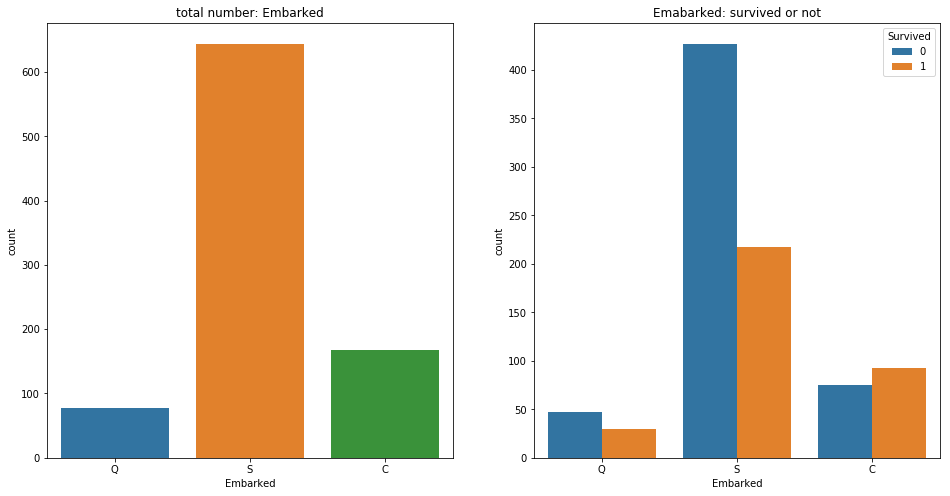

In [6]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot('Embarked', data=data, order=['Q', 'S', 'C'], ax=ax[0])
ax[0].set_title('total number: Embarked')

sns.countplot('Embarked', hue='Survived',data=data, order=['Q', 'S', 'C'], ax=ax[1])
ax[1].set_title('Emabarked: survived or not')
plt.show()

布尔属性 Sex

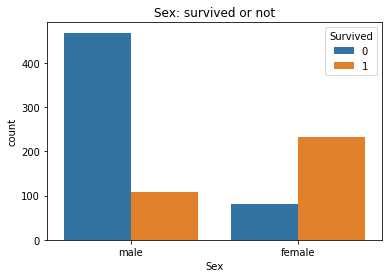

In [7]:

sns.countplot('Sex', hue='Survived',data=data)
plt.title('Sex: survived or not')
plt.show()

女性的存活率高于男性

序数属性  Pclass

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


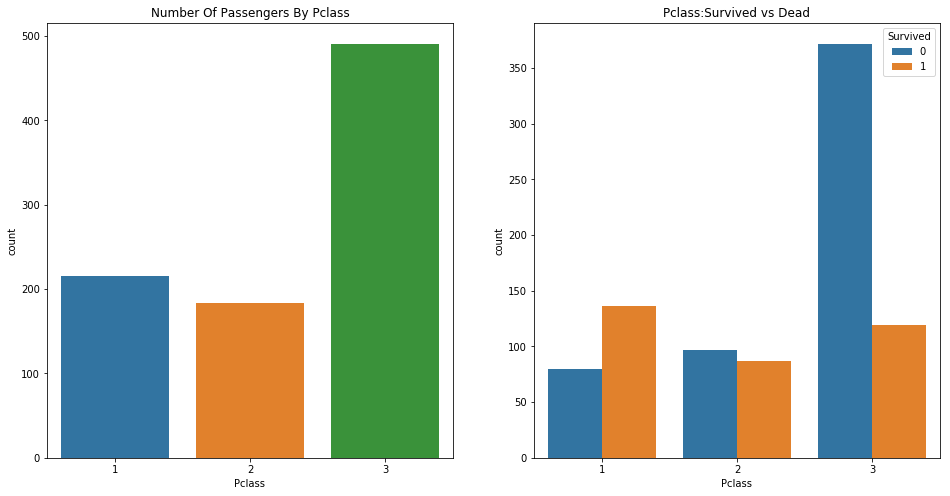

In [9]:
# Pclass分布
f, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot('Pclass', data=data, ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

在Pclass分析中，座位等级1的存活率最高，

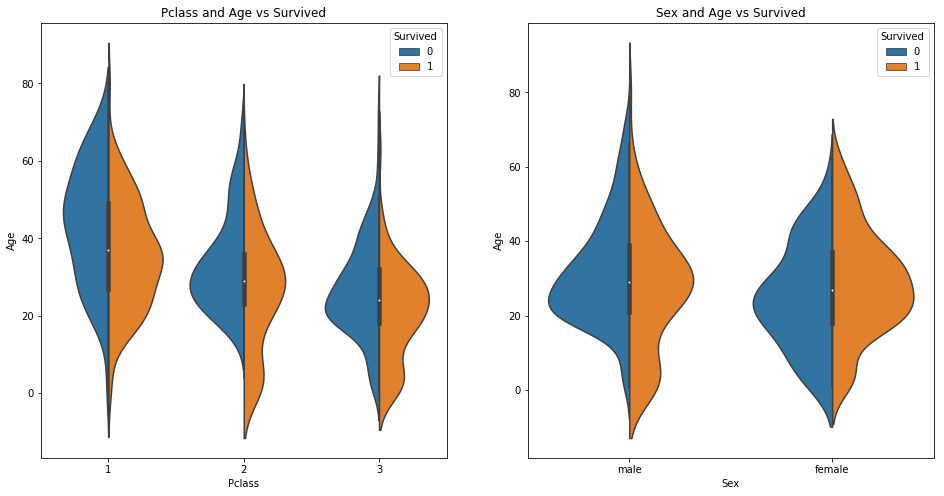

In [10]:
# 年龄分布
f, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived',data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot(x='Sex', y='Age', hue='Survived',data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
plt.show()

结论： 幼童的存活率相当
    女性在20-40的范围内存活率高

In [11]:
# 家庭成员的分布
data['family_size'] = data['SibSp'] + data['Parch']
data['family_size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64

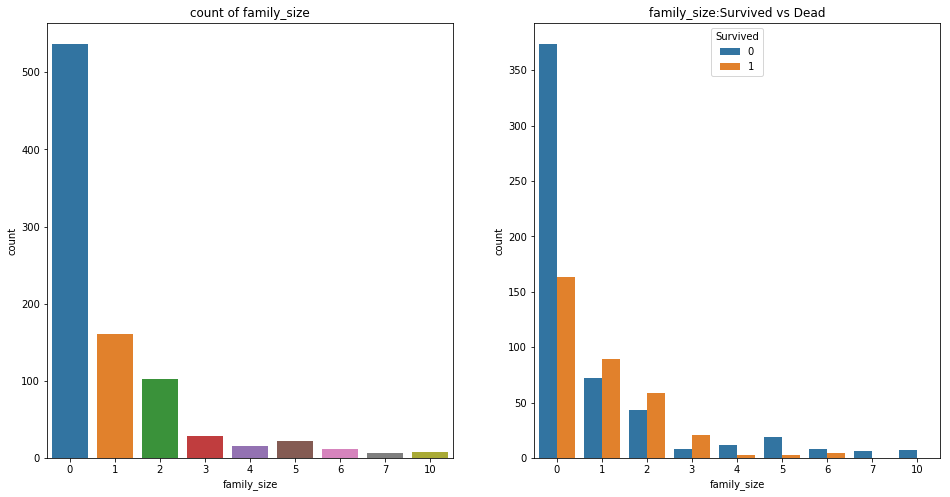

In [12]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot('family_size', data=data, ax=ax[0])
ax[0].set_title('count of family_size')
sns.countplot('family_size', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('family_size:Survived vs Dead')
plt.show()

家庭成员在1-3之间的存活率比较高，大于3或者独身一人的存活率低

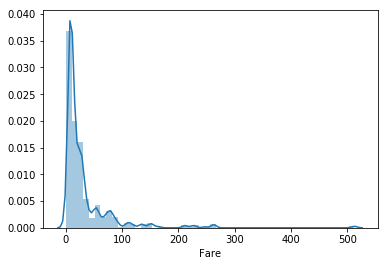

In [13]:
# Fare分布
sns.distplot(data.Fare)
plt.show()

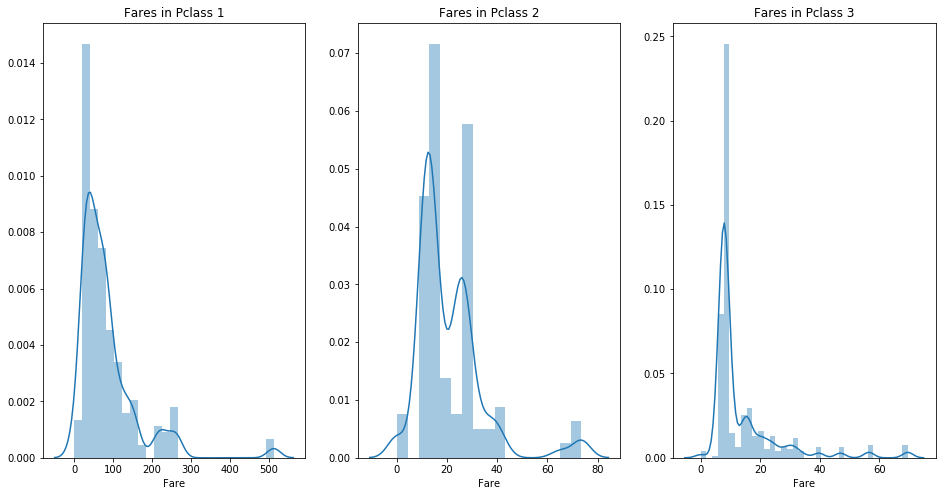

In [14]:
f, ax = plt.subplots(1, 3, figsize=(16,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# # 特征工程

In [15]:
# Age, 依据name进行填充
import re
def name_kind(name):
    title_search = re.search(r'([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""


def name_feature(data):
    """依据名字 将其分为不同的类别"""
    title_mapping = {'Mr': 1,
                     'Miss': 2,
                     'Mrs': 3,
                     "Master": 4,
                     "Dr": 5,
                     "Rev": 6,
                     "Col": 7,
                     "Major": 7,
                     "Mlle": 8,
                     "Don": 9,
                     "Lady": 10,
                     "Mme": 8,
                     "Sir": 9,
                     "Jonkheer": 10,
                     "Countess": 10,
                     "Ms": 2,
                     "Capt": 7}
    data['name_title'] = data['Name'].apply(name_kind)
    data['name_num'] = data['name_title'].map(title_mapping)

    return data

data = name_feature(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,name_title,name_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,1


In [16]:
data['name_title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Jonkheer      1
Sir           1
Mme           1
Don           1
Countess      1
Ms            1
Lady          1
Capt          1
Name: name_title, dtype: int64

In [17]:
data['name_title'].isnull().sum()

0

In [18]:
data.loc[(data.Age.isnull())&(data.name_title == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.name_title == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.name_title == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.name_title == 'Master'), 'Age'] = 5
data.loc[data.Age.isnull(), 'Age'] = 46

In [19]:
data['Age'].isnull().sum()

0

由于Cabin缺失值太多，暂时不考虑,参与建模的属性暂定为：
PassengerID, Survived, Pclass, Sex,Age,Fare, family_size, Embared

In [20]:
filter_data = data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'name_num', 'family_size', 'Embarked']]
# filter_data = filter_data.set_index('PassengerId')

In [21]:
filter_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,name_num,family_size,Embarked
0,1,0,3,male,22.0,7.2500,1,1,S
1,2,1,1,female,38.0,71.2833,3,1,C
2,3,1,3,female,26.0,7.9250,2,0,S
3,4,1,1,female,35.0,53.1000,3,1,S
4,5,0,3,male,35.0,8.0500,1,0,S


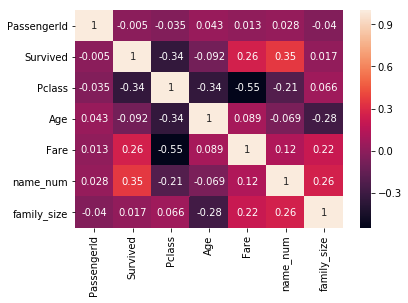

In [22]:
sns.heatmap(filter_data.corr(), annot=True)
plt.show()

In [23]:
# 将字符属性转换为数值型变量
import numpy as np
filter_data.loc[data['Embarked'].isnull(), 'Embarked'] = np.random.choice(['S', 'C', 'Q'])
filter_data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
filter_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

C:\Users\zhouning75\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\zhouning75\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
# filter_data = filter_data.drop(['Sex', 'Embarked'], axis=1)
filter_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,name_num,family_size,Embarked
0,1,0,3,0,22.0,7.2500,1,1,0
1,2,1,1,1,38.0,71.2833,3,1,1
2,3,1,3,1,26.0,7.9250,2,0,0
3,4,1,1,1,35.0,53.1000,3,1,0
4,5,0,3,0,35.0,8.0500,1,0,0


In [25]:
# 新增alone属性
filter_data['alone'] = 0
filter_data.loc[data.family_size == 0, 'alone'] = 1
filter_data.head()

C:\Users\zhouning75\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zhouning75\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Sex,Age,Fare,name_num,family_size,Embarked,alone
0,1,0,3,0,22.0,7.2500,1,1,0,0
1,2,1,1,1,38.0,71.2833,3,1,1,0
2,3,1,3,1,26.0,7.9250,2,0,0,1
3,4,1,1,1,35.0,53.1000,3,1,0,0
4,5,0,3,0,35.0,8.0500,1,0,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
def normalized_data(data):
    """大幅度数值型属性 归一化"""
    scale = StandardScaler()
    data['Age_scaled'] = scale.fit_transform(data['Age'].values.reshape(-1, 1))
    data['Fare_scaled'] = scale.fit_transform(data['Fare'].values.reshape(-1, 1))
    # result = data.drop(['Age', 'Fare'], axis=1)

    return data

filter_data = normalized_data(filter_data)

C:\Users\zhouning75\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\zhouning75\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
filter_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,name_num,family_size,Embarked,alone,Age_scaled,Fare_scaled
0,1,0,3,0,22.0,7.2500,1,1,0,0,-0.591398,-0.502445
1,2,1,1,1,38.0,71.2833,3,1,1,0,0.612997,0.786845
2,3,1,3,1,26.0,7.9250,2,0,0,1,-0.290299,-0.488854
3,4,1,1,1,35.0,53.1000,3,1,0,0,0.387173,0.420730
4,5,0,3,0,35.0,8.0500,1,0,0,1,0.387173,-0.486337


In [28]:
filter_data.drop(['Age', 'Fare'], axis=1, inplace=True)
filter_data.head()

C:\Users\zhouning75\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Sex,name_num,family_size,Embarked,alone,Age_scaled,Fare_scaled
0,1,0,3,0,1,1,0,0,-0.591398,-0.502445
1,2,1,1,1,3,1,1,0,0.612997,0.786845
2,3,1,3,1,2,0,0,1,-0.290299,-0.488854
3,4,1,1,1,3,1,0,0,0.387173,0.420730
4,5,0,3,0,1,0,0,1,0.387173,-0.486337


# 模型训练

In [29]:
# 这里采用逻辑回归试运行
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

train, test = train_test_split(filter_data, random_state=1)
train_x = train.iloc[:, 2:]
train_y = train['Survived']
test_x = test.iloc[:, 2:]
test_y = test['Survived']

x = filter_data.iloc[:, 2:]
y = filter_data['Survived']



In [30]:
# 通过在训练集上的评分 评判模型的性能
model = LogisticRegression(random_state=1)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
metrics.accuracy_score(predict_y,test_y)

0.8026905829596412

In [31]:
# n折交叉验证模型的性能

model_cross = LogisticRegression(random_state=1)
score_list = cross_val_score(model_cross, x, y, cv=5)
print('score: ', score_list.mean(), 'std: ', score_list.std())

score:  0.8136880196979417 std:  0.009703439295438734


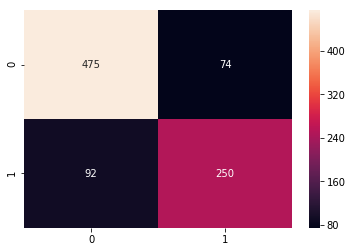

In [32]:
# 用混淆矩阵显示模型
from sklearn.metrics import confusion_matrix
model_cross = LogisticRegression(random_state=1)
predict = cross_val_predict(model_cross, x, y, cv=5)
sns.heatmap(confusion_matrix(y, predict), annot=True,fmt='2.0f')
plt.show()